In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
#Laster inn energidata fra Statsbygg EOS
power = pd.read_excel('Timeforbruk av energi for perioden 01.01.2021 - 18.01.2022.xlsx')
# Laster inn utetemperaturer
utetemp = pd.read_excel('table (1).xlsx')

In [29]:
power = power[3:len(power)-4]
col = ['date', 'meter','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21','22', '23', '24', 'sum']
drops = ['sum']
if len(power.columns) > 27:
    col = ['date', 'meter','type', 'unit', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21','22', '23', '24', 'sum']
    drops = ['sum', 'type', 'unit']
power.columns = col
power = power.drop(labels =drops, axis=1)
power['date'] =pd.to_datetime(power['date'], format='%d.%m.%Y')
power = power.set_index(['meter', 'date'])
power = power.stack().reset_index()
power.columns = ['meter', 'date', 'hour', 'power']
power.date = power.date + pd.to_timedelta(power.hour+':00:00')
power = power.reset_index()
#power = power.set_index(['date'])
meters = power.pivot(index='index', columns='meter', values='power').columns.tolist()
if 'Snitt' in meters:
    meters.remove('Snitt')
if 'Snitt ukedager' in meters:
    meters.remove('Snitt ukedager')

utecols = ['Navn', 'Stasjon', 'Time', 'Temp']
utetemp.columns = utecols
utetemp = utetemp[utetemp.columns.tolist()[2:]]
utetemp['Time'] = pd.to_datetime(utetemp['Time'], format='%d.%m.%Y %H:%M')

power = power.merge(utetemp, left_on='date', right_on='Time', how='inner')
power['weekday'] = power.date.dt.weekday
power['month'] = power.date.dt.month
powerNatt = power[power['hour'] == '4']
power = power.set_index('date')
meters

['El Abn måler Primær (t)', 'El til elkjel (t)']

In [30]:
# Endre variabel "meter" til en av målerne skrevet ut i linjen over
meter = 'El til elkjel (t)'

Text(0.5, 1.0, 'Energiforbruk 2021 for El til elkjel (t)')

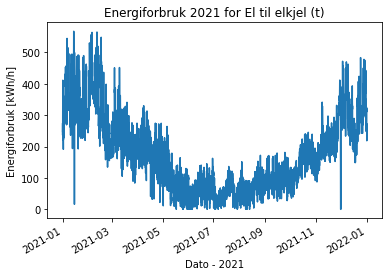

In [31]:
# Graf over energiforbruk i angitt periode
# NB! Hoppene man ser med jevnlige mellomrom i grafen under skyldes hull i tidsserien. Jobber med å finne en løsning
#power = power.set_index(['date'])
power[(power['meter']==meter) & (power.index < '2022-01-01')]['power'].plot()

plt.xlabel('Dato - 2021')
plt.ylabel('Energiforbruk [kWh/h]')

# Tittel
plt.title('Energiforbruk 2021 for ' + meter)
#plt.legend()

In [32]:
power[power['meter']==meter]['power'].sum()

1644237.5999999943

Text(0.5, 1.0, 'Døgnplott for El til elkjel (t)')

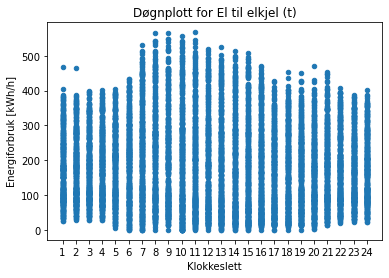

In [33]:
# Døgnplott for valgt måler
power[power['meter']==meter].plot.scatter(x='hour', y='power');
plt.xlabel('Klokkeslett')
plt.ylabel('Energiforbruk [kWh/h]')
 
# Tittel
plt.title('Døgnplott for ' + meter)
#plt.legend()

Text(0.5, 1.0, 'ET-kurve for El til elkjel (t)')

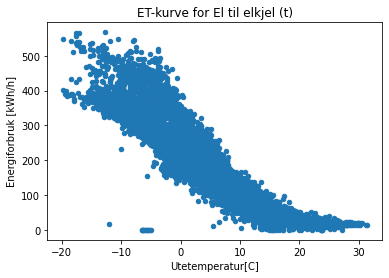

In [34]:
# ET-kurve for valgt måler
power[power['meter']==meter].plot.scatter(x='Temp', y='power')
plt.xlabel('Utetemperatur[C]')
plt.ylabel('Energiforbruk [kWh/h]')
 
# Tittel
plt.title('ET-kurve for ' + meter)
#plt.legend()

Text(0.5, 1.0, 'ET-kurve for måler El til elkjel (t) over 18 grader C')

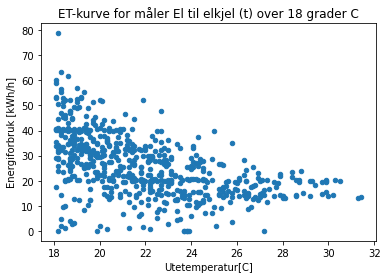

In [35]:
# ET-kurve for valgt måler med filtrering på utetemperatur
# Aktuelt for ELkjel eller fjernvarme for å studere produksjon ved høye / lav temperaturer
temp = 18
zoom = power[power['Temp']>temp]
zoom[zoom['meter']==meter].plot.scatter(x='Temp', y='power')
plt.xlabel('Utetemperatur[C]')
plt.ylabel('Energiforbruk [kWh/h]')
 
# Tittel
plt.title('ET-kurve for måler ' + meter + ' over ' + str(temp) + ' grader C')
#plt.legend()

Text(0.5, 1.0, 'Ukeplott for måler El til elkjel (t)')

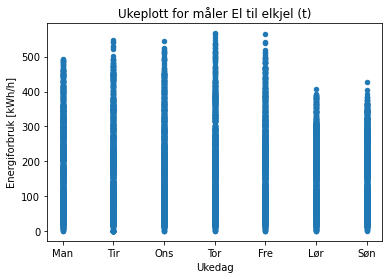

In [36]:
# Ukeplott for angitt måler
# Aktuelt for å sjekke varisjoner i drift (helg og evt. spesielle ukedager)
power[power['meter']==meter].plot.scatter(x='weekday', y='power')
plt.xticks([0,1,2,3,4,5,6],['Man', 'Tir', 'Ons', 'Tor', 'Fre', 'Lør', 'Søn'])
plt.xlabel('Ukedag')
plt.ylabel('Energiforbruk [kWh/h]')
 
# Tittel
plt.title('Ukeplott for måler ' + meter)
#plt.legend()


Text(0.5, 1.0, 'Månedsplott for måler El til elkjel (t)')

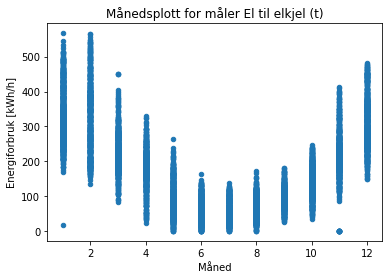

In [37]:
# Ukeplott for angitt måler
# Aktuelt for å sjekke varisjoner i drift (helg og evt. spesielle ukedager)
power[power['meter']==meter].plot.scatter(x='month', y='power')
plt.xlabel('Måned')
plt.ylabel('Energiforbruk [kWh/h]')
 
# Tittel
plt.title('Månedsplott for måler ' + meter)
#plt.legend()


Text(0.5, 1.0, 'ET-kurve natt (04:00) for måler El til elkjel (t)')

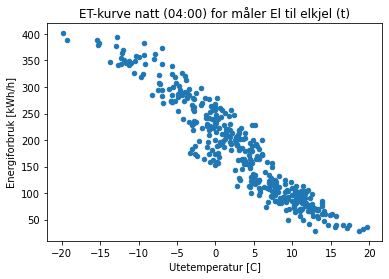

In [38]:
powerNatt[powerNatt['meter'] == meter].plot.scatter(x='Temp', y='power')
plt.xlabel('Utetemperatur [C]')
plt.ylabel('Energiforbruk [kWh/h]')
 
# Tittel
plt.title('ET-kurve natt (04:00) for måler ' + meter)
#plt.legend()


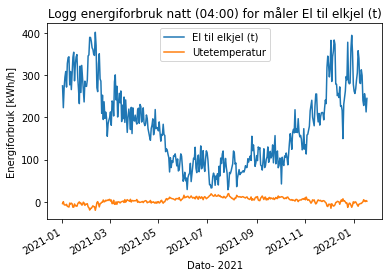

In [39]:
# Logg energiforbruk natt.
# Nyttig for å sjekke styring varmekabel/ elektrisk oppvarming, samt nattlast (pumper og evt. lys - avhengig av drift)
powerNatt.set_index('date', inplace=True)
a = powerNatt[powerNatt['meter'] == meter]['power'].plot()
powerNatt[powerNatt['meter'] == meter]['Temp'].plot(ax=a)
plt.xlabel('Dato- 2021')
plt.ylabel('Energiforbruk [kWh/h]')
 
# Tittel
plt.title('Logg energiforbruk natt (04:00) for måler ' + meter)
plt.legend([meter, 'Utetemperatur'])

In [26]:
# Simulering varmepumpe
# Legg inn effekt varmepumpe
effektVP = 40
power['Varmepumpe'] = power['power']
power['Varmepumpe'][power['Varmepumpe'] > effektVP] = effektVP


C:\Users\amy\AppData\Local\Temp/ipykernel_14412/118762329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power['Varmepumpe'][power['Varmepumpe'] > effektVP] = effektVP


In [102]:
# Andel varmepumpeproduksjon
sum(power['Varmepumpe'])/sum(power['power'])

0.8650790901151465

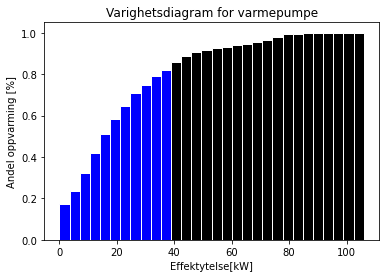

In [105]:
fig, ax = plt.subplots()

N, bins, patches = ax.hist(power['power']-min(power['power']), edgecolor='white', linewidth=1, cumulative=True, bins=30, density=1)
cutVP = round(effektVP/max(power.power)*30)
for i in range(0,cutVP):
    patches[i].set_facecolor('b')
for i in range(cutVP, len(patches)):
    patches[i].set_facecolor('black')
plt.xlabel('Effektytelse[kW]')
plt.ylabel('Andel oppvarming [%]')
 
# Tittel
plt.title('Varighetsdiagram for varmepumpe')
plt.show()